In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
YP = pd.read_csv(r'/mnt/g/nelson_new/OP2_SOST.csv', header = 0, index_col=0)

In [3]:
YP

ANN9   nearest   surface      dmp1     fgf23     yopro
ID                                                               
48      64.6617   47.0987  -1.61749  664.4990  45.25990   5.29815
49      43.7585   16.0263  -1.98045  694.4220   2.47893   9.08816
50      37.3500   16.0263  -9.13655  696.1880  10.55340   8.81032
51      39.9767   19.6241 -13.59960  705.6890   4.92622  13.36950
53      39.6023   21.5148 -14.91870  694.5730   3.56666   6.66852
...         ...       ...       ...       ...       ...       ...
36651  184.9390   68.8994 -36.32970   67.4720   3.25429   4.40216
36768  203.0740  118.3560 -11.00660   83.4596   7.10882   9.24671
36772  178.0090   68.8994 -46.53050   39.5648   2.85748   3.19570
36814  247.1990   14.4757 -18.16530   44.8461   6.25042   8.90357
36815  245.9300   14.4757 -15.07430   47.4765  10.30880  12.60010

[3236 rows x 6 columns]

In [4]:
YP_subset = YP.sample(n = 2000)

In [5]:
YP_subset_original = YP.sample(n = 2000)

In [6]:
YP_subset_UMAP = YP_subset

In [7]:
YP_subset

ANN9   nearest  surface       dmp1      fgf23     yopro
ID                                                                
3078    99.8424  55.38250 -19.6600  466.89200   0.547488   5.51886
1786    45.9230  22.36710 -25.3185  392.03600   2.098630  19.49130
3837    37.0098  22.70510 -72.8112  356.76200  21.513800  24.27400
1504    46.8462  24.13550 -70.7308  585.30800  28.002500   9.58301
2220    32.5471  24.39950 -50.6454  420.94700   3.383820  17.89380
...         ...       ...      ...        ...        ...       ...
14604   43.5488  10.67790 -12.1687   50.82550   1.224490   7.75061
31500  157.9550  49.02450 -18.0149    8.51182  85.088500  13.83800
7984    72.2876   7.93239 -17.8793  190.49500  35.782600   2.90659
22627   67.4699  30.12960 -61.5007   44.16020   1.383170  16.76610
24169   37.9179  28.85280 -77.4858   41.75120   3.165370  16.06490

[2000 rows x 6 columns]

In [8]:
from plotly.offline import init_notebook_mode, iplot

In [9]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

In [10]:
corr = YP_subset.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Correlation Plot of Player Skills")
fig = dict(data=data, layout=layout)
iplot(fig)

In [11]:
from sklearn.decomposition import PCA
pca = PCA().fit(YP_subset)

In [12]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="YOPRO+ Dataset - PCA Explained Variance || 100% achieved at 5 components")
fig = dict(data=data, layout=layout)
iplot(fig)

In [13]:
pca = PCA(n_components=5)
skillsPCA = pca.fit_transform(YP_subset)

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [15]:

X=YP_subset
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [17]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [18]:
dfskillsPCA

0           1          2          3         4  cluster
0     307.431667   45.292641   5.065473  29.522462  3.503977        0
1     231.915017   -9.335142 -19.066083   8.386040  1.367857        2
2     194.270943  -33.708221  22.812357  -4.850684 -4.599565        2
3     422.776685  -28.902468  35.261548  -8.325156 -2.046248        0
4     259.501333  -31.556119   0.341174   9.856320 -3.478229        2
...          ...         ...        ...        ...       ...      ...
1995 -108.211593    0.873582 -48.431734   2.411216  5.450606        1
1996 -150.172906  119.522182  24.922481 -44.052939 -0.199120        4
1997   31.137187   23.404432 -20.113520 -26.208250  9.656633        3
1998 -117.144370    3.289425   7.426037  16.923499  9.366898        1
1999 -120.483607  -27.644901  11.255167  14.607197 -2.720340        1

[2000 rows x 6 columns]

In [19]:
from sklearn.manifold import TSNE
X1 = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X1)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mcrewcow/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
skillsPCA_labels

array([0, 2, 2, ..., 3, 1, 1], dtype=int32)

In [22]:
YP_subset['cluster'] = skillsPCA_labels

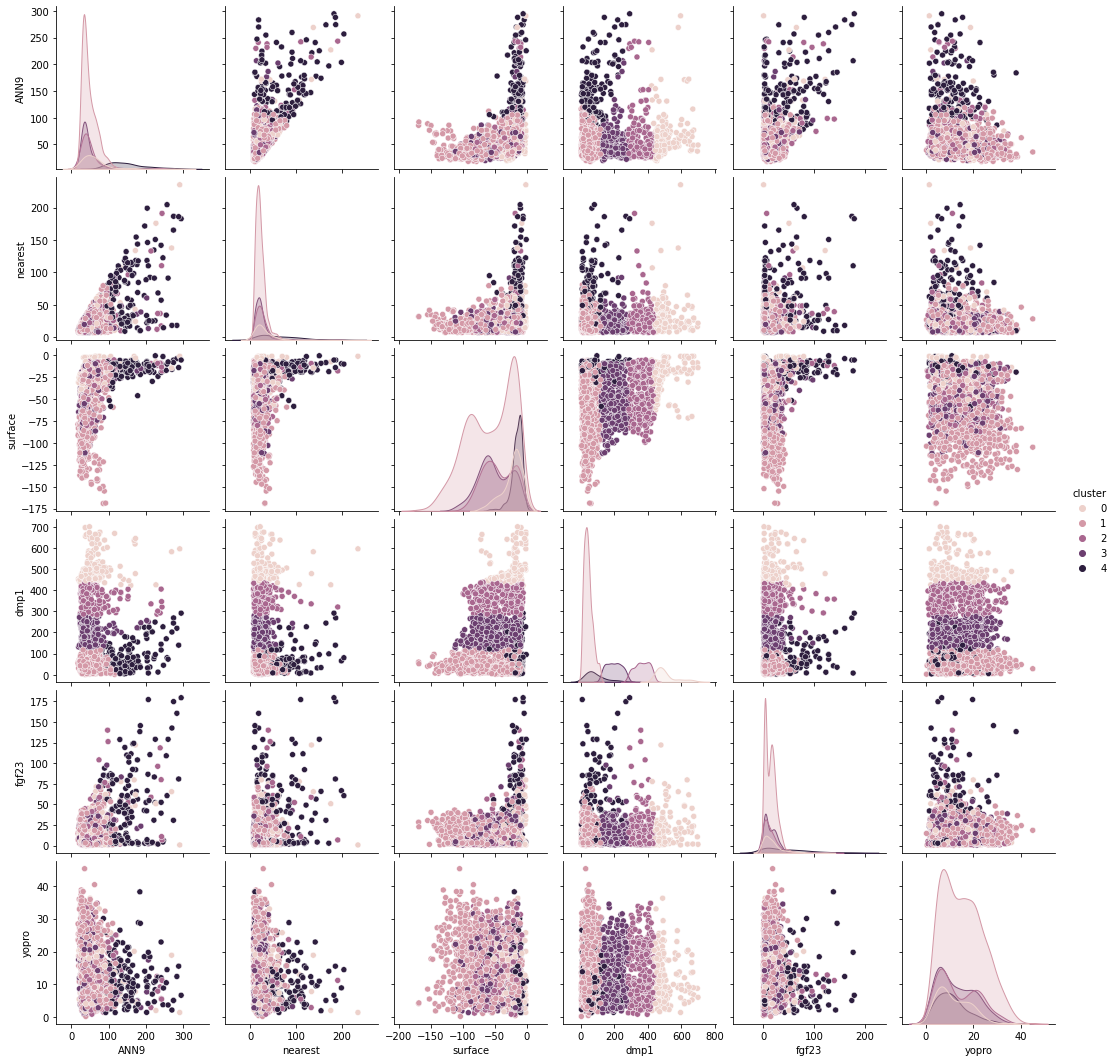

In [23]:
sns.pairplot(YP_subset, hue='cluster');

In [24]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(YP_subset)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

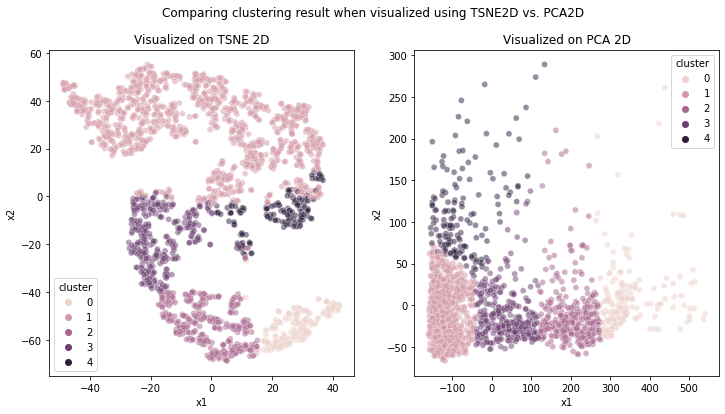

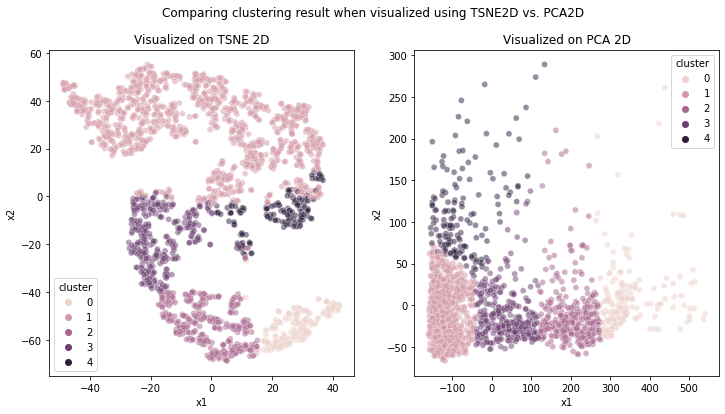

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [26]:
import umap

In [27]:
reducer = umap.UMAP()

In [28]:
YP_subset_UMAP

ANN9   nearest  surface       dmp1      fgf23     yopro  cluster
ID                                                                         
3078    99.8424  55.38250 -19.6600  466.89200   0.547488   5.51886        0
1786    45.9230  22.36710 -25.3185  392.03600   2.098630  19.49130        2
3837    37.0098  22.70510 -72.8112  356.76200  21.513800  24.27400        2
1504    46.8462  24.13550 -70.7308  585.30800  28.002500   9.58301        0
2220    32.5471  24.39950 -50.6454  420.94700   3.383820  17.89380        2
...         ...       ...      ...        ...        ...       ...      ...
14604   43.5488  10.67790 -12.1687   50.82550   1.224490   7.75061        1
31500  157.9550  49.02450 -18.0149    8.51182  85.088500  13.83800        4
7984    72.2876   7.93239 -17.8793  190.49500  35.782600   2.90659        3
22627   67.4699  30.12960 -61.5007   44.16020   1.383170  16.76610        1
24169   37.9179  28.85280 -77.4858   41.75120   3.165370  16.06490        1

[2000 rows x 7 columns]

In [29]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [30]:
data = YP_subset_UMAP[
    [
        "ANN9",
        "dmp1",
        "fgf23",
        "yopro",
        'nearest',
        'surface'
    ] 
].values
scaled_data = StandardScaler().fit_transform(data)

In [31]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(2000, 2)

In [32]:
embedding

array([[-0.79448825,  9.496186  ],
       [ 1.5976709 , 10.239019  ],
       [ 2.938491  ,  9.701664  ],
       ...,
       [ 1.6004652 ,  3.4033744 ],
       [ 5.9090776 ,  2.7321491 ],
       [ 6.887384  ,  3.843394  ]], dtype=float32)

In [33]:
embedding = pd.DataFrame(embedding)
embedding['cluster'] = skillsPCA_labels

In [34]:
embedding

0          1  cluster
0    -0.794488   9.496186        0
1     1.597671  10.239019        2
2     2.938491   9.701664        2
3     1.673449   8.989655        0
4     2.097568   9.589298        2
...        ...        ...      ...
1995  3.158201   2.298499        1
1996 -0.583594   2.857392        4
1997  1.600465   3.403374        3
1998  5.909078   2.732149        1
1999  6.887384   3.843394        1

[2000 rows x 3 columns]

In [35]:
embedding.columns = ['x1','x2','cluster']

In [36]:
embedding

x1         x2  cluster
0    -0.794488   9.496186        0
1     1.597671  10.239019        2
2     2.938491   9.701664        2
3     1.673449   8.989655        0
4     2.097568   9.589298        2
...        ...        ...      ...
1995  3.158201   2.298499        1
1996 -0.583594   2.857392        4
1997  1.600465   3.403374        3
1998  5.909078   2.732149        1
1999  6.887384   3.843394        1

[2000 rows x 3 columns]

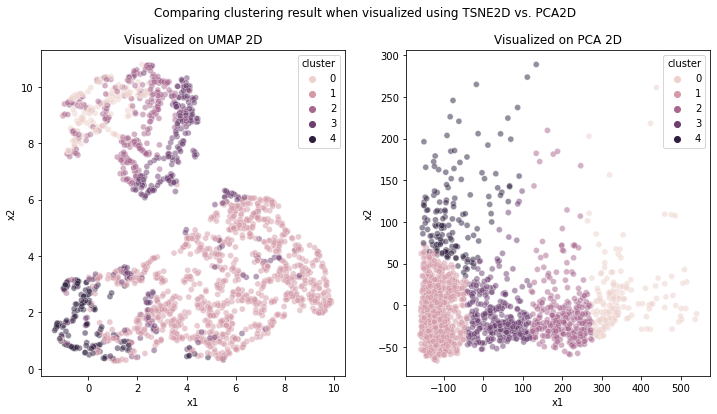

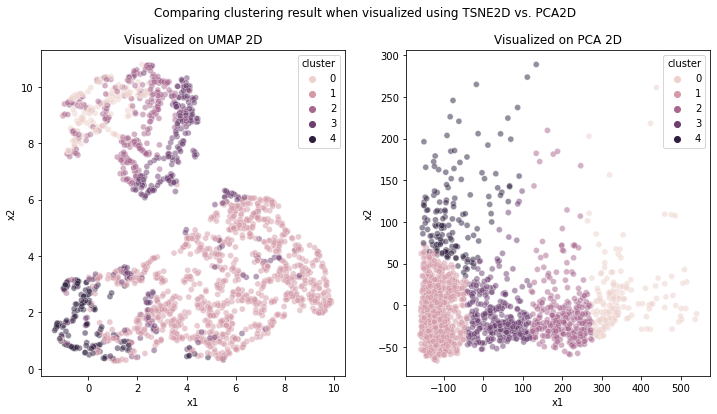

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=embedding,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on UMAP 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [38]:
YP_subset_original

ANN9  nearest   surface      dmp1      fgf23     yopro
ID                                                              
20806  78.3048  18.1455 -12.43130   43.8445    3.88717   8.83097
34413  73.6068  19.4059 -17.58140   29.5351    5.22492   7.34659
3265   81.1306  37.2434  -8.86837  396.7600  111.52600  10.84360
3328   33.5638  15.3314 -16.80800  371.4010    1.89672   5.39190
19380  53.3791  17.4771 -21.53340   81.0244   15.75920  13.91750
...        ...      ...       ...       ...        ...       ...
27962  32.1429  10.1300 -93.74400   76.6003   20.96310  17.63640
31294  26.2011  13.6418 -58.21250   27.5304    9.86308  14.74970
27176  73.5196  45.9814 -34.80560   18.3477    2.47545  14.98170
33156  43.7145  33.1700 -33.86490   45.9416   15.96910  15.88350
3048   46.6970  15.6687 -55.63040  550.4690   21.54850   5.49506

[2000 rows x 6 columns]

In [39]:
import plotly.express as px

In [40]:
fig2 = px.scatter_3d(YP_subset_original, x="dmp1", y="fgf23",z="yopro",
                     color="ANN9")
fig2.update_layout(title="4 Features Representation")
fig2.show()

In [41]:
dftsne

x1         x2  cluster
0     24.543123 -50.553013        0
1      5.959382 -54.127090        2
2     -8.346222 -56.605225        2
3     39.121517 -49.724762        0
4     10.714003 -63.935295        2
...         ...        ...      ...
1995   9.270143  21.894329        1
1996  36.747398   6.776279        4
1997  -6.157441 -15.262914        3
1998  -5.522057  33.509171        1
1999 -13.178911  38.517921        1

[2000 rows x 3 columns]

In [42]:
YP_subset_UMAP

ANN9   nearest  surface       dmp1      fgf23     yopro  cluster
ID                                                                         
3078    99.8424  55.38250 -19.6600  466.89200   0.547488   5.51886        0
1786    45.9230  22.36710 -25.3185  392.03600   2.098630  19.49130        2
3837    37.0098  22.70510 -72.8112  356.76200  21.513800  24.27400        2
1504    46.8462  24.13550 -70.7308  585.30800  28.002500   9.58301        0
2220    32.5471  24.39950 -50.6454  420.94700   3.383820  17.89380        2
...         ...       ...      ...        ...        ...       ...      ...
14604   43.5488  10.67790 -12.1687   50.82550   1.224490   7.75061        1
31500  157.9550  49.02450 -18.0149    8.51182  85.088500  13.83800        4
7984    72.2876   7.93239 -17.8793  190.49500  35.782600   2.90659        3
22627   67.4699  30.12960 -61.5007   44.16020   1.383170  16.76610        1
24169   37.9179  28.85280 -77.4858   41.75120   3.165370  16.06490        1

[2000 rows x 7 columns]

In [43]:
avgs_raw = YP_subset_UMAP

In [44]:
avgs_raw = avgs_raw.groupby('cluster').mean()

In [45]:
avgs_raw['surface'] = avgs_raw['surface'].abs()

In [46]:
cols = list(avgs_raw.columns.values)
cols

['ANN9', 'nearest', 'surface', 'dmp1', 'fgf23', 'yopro']

In [47]:
avgs_raw_new = avgs_raw.reindex(columns=['ANN9', 'nearest', 'surface', 'dmp1', 'fgf23', 'sost'])

<AxesSubplot:xlabel='cluster'>

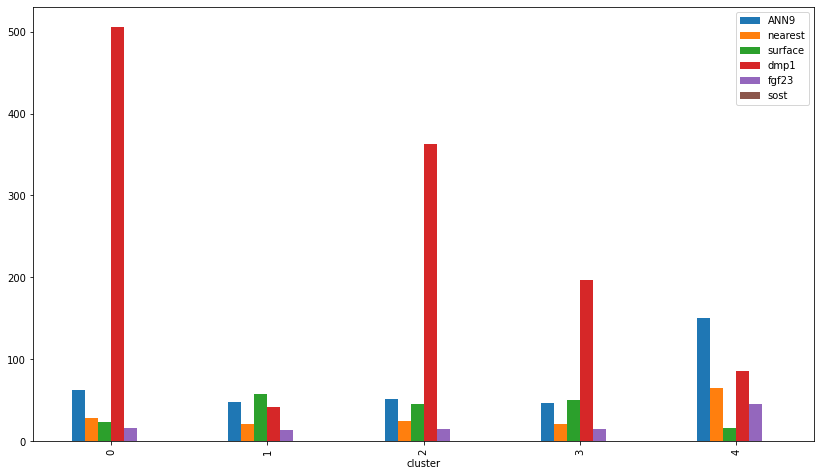

In [48]:
avgs_raw_new.plot.bar(figsize = (14,8))

In [49]:
YP_subset_UMAP.cluster.value_counts()

1    1046
3     314
2     306
0     181
4     153
Name: cluster, dtype: int64